In [1]:
!pip install -q -U autogluon.tabular

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.12.3 requires botocore<1.34.70,>=1.34.41, but you have botocore 1.29.165 which is incompatible.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.


In [2]:
from autogluon.tabular import TabularPredictor,TabularDataset
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import shutil

warnings.filterwarnings('ignore')
seed = 27

# Loading the Dataset

In [3]:
train = pd.read_csv('/kaggle/input/flood-prediction-precomputed-stat-features/train.csv', index_col='id')

In [4]:
feats_to_drop = [
    '_sort_6', '_cnt17', 'Deforestation', 'Watersheds', '_std', '_cnt1', '_cnt12', 
    '_cnt16', '_cnt8', '_sort_9', 'RiverManagement', 'Encroachments', '_30th', '_10th', 
    '_min', 'DrainageSystems', '_sort_7', '_40th', '_sort_5', 'PoliticalFactors', 
    'ClimateChange', '_mode', 'Landslides', 'TopographyDrainage', 'PopulationScore'
]
train = train.drop(columns=feats_to_drop)

In [5]:
_train, _val = train_test_split(
    train, 
    test_size=0.1, 
    random_state=seed
)

del train

In [6]:
_train = TabularDataset(_train)
_val = TabularDataset(_val)

# Training

In [7]:
predictor = TabularPredictor(
    label='FloodProbability',
    eval_metric='r2',
    problem_type="regression",
    verbosity=2
).fit(
    train_data=_train,
    time_limit=3600 * 10,
    presets="best_quality",
    excluded_model_types = ["NN_TORCH", "FASTAI", "NN"],
    keep_only_best=True,
    hyperparameter_tune_kwargs={  
        'num_trials': 50,
        'scheduler' : 'local',
        'searcher'  : 'auto'
    },
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240518_085659"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 36000 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240518_085659/ds_sub_fit/sub_fit_ho.
2024-05-18 08:57:00,486	INFO util.py:124 -- Outdated packages:
  ipywidgets==

  0%|          | 0/50 [00:00<?, ?it/s]

Will use sequential fold fitting strategy because import of ray failed. Reason: ray==2.9.0 detected. 2.10.0 <= ray < 2.11.0 is required. You can use pip to install certain version of ray `pip install ray==2.10.0` 
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 15. Best iteration is:
	[14]	valid_set's l2: 0.000956886	valid_set's r2: -80.8396
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 11. Best iteration is:
	[11]	valid_set's l2: 0.000876686	valid_set's r2: -80.7735
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 8. Best iteration is:
	[8]	valid_set's l2: 0.00141159	valid_set's r2: -80.9646
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 5. Best

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 12. Best iteration is:
	[12]	valid_set's l2: 0.00101341	valid_set's r2: -80.6525
	Ran out of time, early stopping on iteration 12. Best iteration is:
	[11]	valid_set's l2: 0.00107526	valid_set's r2: -81.5829
	Ran out of time, early stopping on iteration 13. Best iteration is:
	[11]	valid_set's l2: 0.00107958	valid_set's r2: -81.0527
	Ran out of time, early stopping on iteration 14. Best iteration is:
	[11]	valid_set's l2: 0.00108189	valid_set's r2: -80.7847
	Ran out of time, early stopping on iteration 14. Best iteration is:
	[11]	valid_set's l2: 0.00107831	valid_set's r2: -81.2557
	Ran out of time, early stopping on iteration 15. Best iteration is:
	[11]	valid_set's l2: 0.00107929	valid_set's r2: -81.1828
	Ran out of time, early stopping on iteration 17. Best iteration is:
	[11]	valid_set's l2: 0.00106916	valid_set's r2: -82.0156
	Ran out of time, early

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 20.
	Ran out of time, early stopping on iteration 22.
	Ran out of time, early stopping on iteration 23.
	Ran out of time, early stopping on iteration 24.
	Ran out of time, early stopping on iteration 25.
	Ran out of time, early stopping on iteration 27.
	Ran out of time, early stopping on iteration 30.
	Ran out of time, early stopping on iteration 36.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L1/T1 ...
	0.7866	 = Validation score   (r2)
	75.91s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L1 ... Tuning model for up to 84.3s of the 8705.56s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
No model was trained during hyperparameter tuning XGBoost_BAG_L1... Skipping this model.
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 84.3s of the 8603.83s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 12. Best iterati

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00239392	valid_set's r2: -91.5304
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00231032	valid_set's r2: -88.6308
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00239488	valid_set's r2: -91.513
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00258234	valid_set's r2: -94.0909
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iterati

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00238857	valid_set's r2: -90.6446
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00230326	valid_set's r2: -89.4057
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00238879	valid_set's r2: -90.6446
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00258146	valid_set's r2: -94.0909
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iterat

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 12.
	Ran out of time, early stopping on iteration 14.
	Ran out of time, early stopping on iteration 18.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L2/T1 ...
	0.296	 = Validation score   (r2)
	60.34s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L2 ... Tuning model for up to 68.65s of the 4407.31s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autog

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
No model was trained during hyperparameter tuning XGBoost_BAG_L2... Skipping this model.
Fitting model: LightGBMLarge_BAG_L2 ... Training model for up to 68.65s of the 4298.94s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00247532	valid_set's r2: -94.012
	Time limit exceeded... Skipping LightGBMLarge_BAG_L2.
Hyperparameter tuning model: CatBoost_r177_BAG_L2 ... Tuning model for up to 68.65s of the 4285.8s of remaining time.
	No hyperparameter search space specified for CatBoost_r177_BAG_L2. Skipping HPO. Will train one model based on the 

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 83. Best iteration is:
	[81]	valid_set's l2: 0.000358078	valid_set's r2: -81.2758
	Ran out of time, early stopping on iteration 83. Best iteration is:
	[82]	valid_set's l2: 0.000359662	valid_set's r2: -81.0258
	Ran out of time, early stopping on iteration 78. Best iteration is:
	[77]	valid_set's l2: 0.000362207	valid_set's r2: -81.7886
	Ran out of time, early stopping on iteration 86. Best iteration is:
	[86]	valid_set's l2: 0.00035633	valid_set's r2: -81.6256
	Ran out of time, early stopping on iteration 93. Best iteration is:
	[93]	valid_set's l2: 0.000357868	valid_set's r2: -80.962
	Ran out of time, early stopping on iteration 98. Best iteration is:
	[98]	valid_set's l2: 0.000354908	valid_set's r2: -81.458
	Ran out of time, early stopping on iteration 108. Best iteration is:
	[103]	valid_set's l2: 0.000358159	valid_set's r2: -81.0073
	Ran out of time,

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	0.5859	 = Validation score   (r2)
	143.87s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: RandomForestMSE_BAG_L1 ... Tuning model for up to 266.94s of the 28066.35s of remaining time.
	No hyperparameter search space specified for RandomForestMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/bagged_ensemble_model.py", line 1334, in _hyperparameter_tune
    hpo_executor.validate_search_space(search_space, self.name)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/hpo/executors.py", line 512, in validate_search_space
    raise EmptySearchSpace
autogluon.core.hpo.exceptions.EmptySearchSpace

During handling of the above exception, ano

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 81.
	Ran out of time, early stopping on iteration 83.
	Ran out of time, early stopping on iteration 89.
	Ran out of time, early stopping on iteration 87.
	Ran out of time, early stopping on iteration 96.
	Ran out of time, early stopping on iteration 104.
	Ran out of time, early stopping on iteration 115.
	Ran out of time, early stopping on iteration 142.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L1/T1 ...
	0.8659	 = Validation score   (r2)
	250.66s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L1 ... Tuning model for up to 266.94s of the 27772.97s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE_BAG_L1 ...
	0.8674	 = Validation score   (r2)
	2

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L1/T1 ...
	0.8497	 = Validation score   (r2)
	253.03s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 266.94s of the 27246.03s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	0.6157	 = Validation score   (r2)
	204.75s	 = Training   runtime
	1.52s	 = Validation runtime
Hyperparameter tuning model: CatBoost_r177_BAG_L1 ... Tuning model for up to 266.94s of the 27038.11s of remaining time.
	No hyperparameter search space specified for CatBoost_r177_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 166.
	Ran out of time, early stopping on iteration 174

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 24. Best iteration is:
	[24]	valid_set's l2: 0.000548225	valid_set's r2: -81.0573
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 19. Best iteration is:
	[19]	valid_set's l2: 0.000498035	valid_set's r2: -81.0578
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 13. Best iteration is:
	[13]	valid_set's l2: 0.000959147	valid_set's r2: -81.1204
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 9. Best iteration is:
	[9]	valid_set's l2: 0.0023749	valid_set's r2: -90.3038
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 3. Bes

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 15. Best iteration is:
	[14]	valid_set's l2: 0.000882482	valid_set's r2: -81.0576
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 9. Best iteration is:
	[9]	valid_set's l2: 0.000956518	valid_set's r2: -81.0576
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 7. Best iteration is:
	[6]	valid_set's l2: 0.00156925	valid_set's r2: -81.3167
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 4. Best iteration is:
	[1]	valid_set's l2: 0.0025819	valid_set's r2: -93.9617
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best ite

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 28.
	Ran out of time, early stopping on iteration 25.
	Ran out of time, early stopping on iteration 31.
	Ran out of time, early stopping on iteration 32.
	Ran out of time, early stopping on iteration 33.
	Ran out of time, early stopping on iteration 34.
	Ran out of time, early stopping on iteration 38.
	Ran out of time, early stopping on iteration 45.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L2/T1 ...
	0.8271	 = Validation score   (r2)
	204.3s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L2 ... Tuning model for up to 216.52s of the 14078.38s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packag

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
No model was trained during hyperparameter tuning XGBoost_BAG_L2... Skipping this model.
Fitting model: LightGBMLarge_BAG_L2 ... Training model for up to 216.52s of the 13807.68s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 15. Best iter

In [8]:
X_train = _train.drop('FloodProbability', axis=1)
y_train = _train['FloodProbability']

y_preds = predictor.predict(X_train)

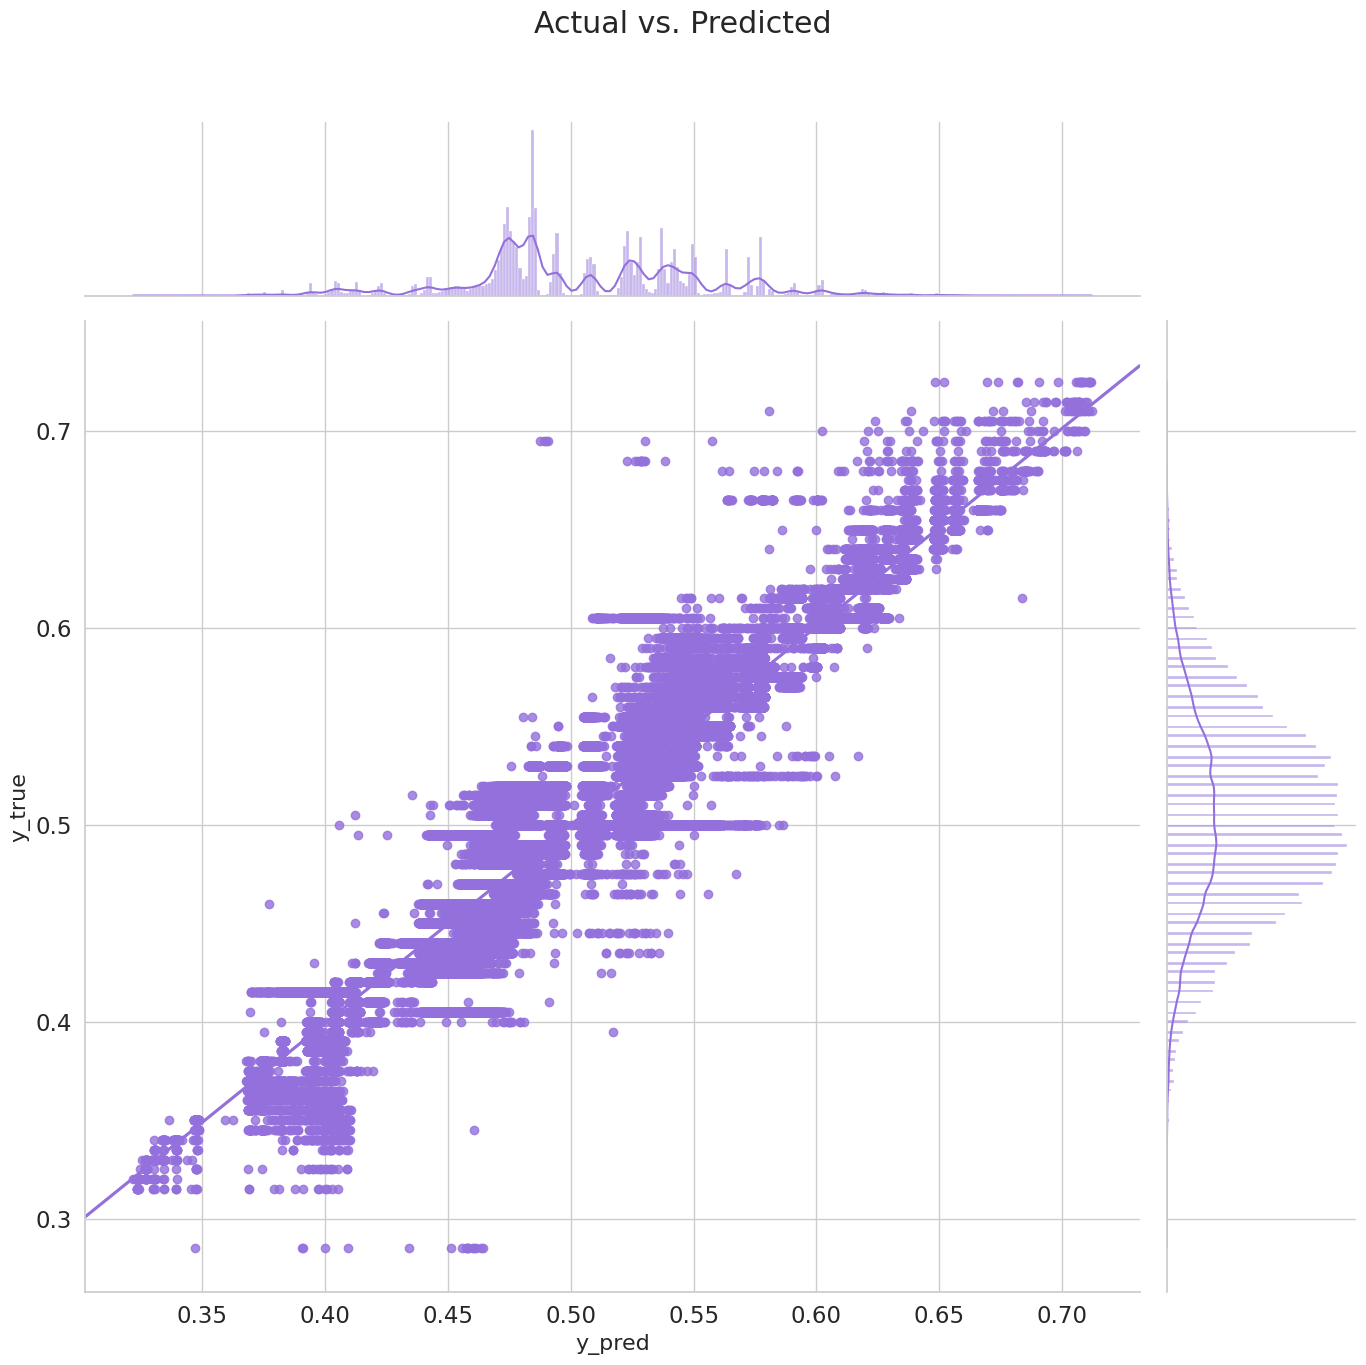

In [9]:
sns.set(style="whitegrid", font_scale=1.5)
g = sns.jointplot(
    x=y_preds,
    y=y_train,
    kind="reg",
    truncate=False,
    color='#9370DB',
    height=14,
)
g.set_axis_labels('y_pred', 'y_true', fontsize=16)
g.fig.suptitle("Actual vs. Predicted")
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9)

# Visualizing the Results

In [10]:
score = predictor.evaluate(_val, silent=True)['r2']

In [11]:
print(f"Validation R2 Score: {score}")

Validation R2 Score: 0.8693758131447198


In [12]:
fi = predictor.feature_importance(data=_val, silent=True)
lb = predictor.leaderboard(_val, silent=True)

These features in provided data are not utilized by the predictor and will be ignored: ['_sort_19', '_50th', '_cnt19', '_cnt22']


In [13]:
lb.style.background_gradient(subset=['score_val', 'score_test'], cmap='RdYlGn')

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,0.869376,0.869263,r2,97.466874,1.762968,12588.324118,0.008145,0.020072,7.958256,3,True,54
1,XGBoost_r194_BAG_L1,0.869279,0.869123,r2,1.016113,0.004330,223.926213,1.016113,0.004330,223.926213,1,True,19
2,CatBoost_r6_BAG_L2,0.869128,0.868886,r2,96.616539,1.738496,12371.645104,0.817378,0.004371,207.388173,2,True,53
3,ExtraTrees_r4_BAG_L1,0.868641,0.868029,r2,0.977248,0.003104,288.468977,0.977248,0.003104,288.468977,1,True,33
4,CatBoost_r180_BAG_L1,0.868530,0.868536,r2,1.126163,0.004490,252.331014,1.126163,0.004490,252.331014,1,True,44
5,ExtraTreesMSE_BAG_L1,0.868383,0.867359,r2,0.768121,0.003150,269.108546,0.768121,0.003150,269.108546,1,True,4
6,ExtraTrees_r172_BAG_L1,0.868365,0.867594,r2,0.600418,0.003137,244.164139,0.600418,0.003137,244.164139,1,True,20
7,CatBoost_r6_BAG_L1,0.868312,0.868339,r2,1.189496,0.004246,252.744410,1.189496,0.004246,252.744410,1,True,42
8,ExtraTrees_r42_BAG_L1,0.868305,0.867466,r2,1.024263,0.003131,271.342386,1.024263,0.003131,271.342386,1,True,12
9,CatBoost_r167_BAG_L1,0.868274,0.868284,r2,0.339662,0.004271,252.234963,0.339662,0.004271,252.234963,1,True,25


In [14]:
fi.style.background_gradient(cmap='RdYlGn')

,importance,stddev,p_value,n,p99_high,p99_low
_sum,0.860552,0.008717,0.000000,5,0.878500,0.842603
_sum_log,0.027133,0.000763,0.000000,5,0.028705,0.025561
_mean,0.016964,0.000711,0.000000,5,0.018427,0.015500
_entropy,0.003088,0.000319,0.000013,5,0.003744,0.002431
_special1,0.001184,0.000185,0.000069,5,0.001564,0.000803
_max,0.000831,0.000172,0.000208,5,0.001185,0.000477
_2nd_moment,0.000603,0.000186,0.000966,5,0.000987,0.000220
_cnt15,0.000409,0.000188,0.004150,5,0.000797,0.000021
_3rd_moment,0.000289,0.000107,0.001913,5,0.000510,0.000068
_skew,0.000258,0.000158,0.010925,5,0.000583,-0.000068


# Making Predictions and Creating a Submission File

In [15]:
test = pd.read_csv('/kaggle/input/flood-prediction-precomputed-stat-features/test.csv', index_col='id')
test = test.drop(columns=feats_to_drop)
test = TabularDataset(test)

preds = predictor.predict(test)

In [16]:
submission = pd.DataFrame({'id': test.index, 'FloodProbability ': preds})
submission.to_csv(f'autogluon-{score:.6f}.csv', index=False)
submission.head()

,id,FloodProbability
id,,
1117957,1117957,0.578323
1117958,1117958,0.455431
1117959,1117959,0.447185
1117960,1117960,0.465727
1117961,1117961,0.466845


In [17]:
shutil.rmtree("AutogluonModels")